# Self Organizing Maps (SOM) / Kohonen

In [1]:
#Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Inisiasi Data Point
X = np.array([[0,0],[2,0],
              [0,2],[2,2],
              [4,4],[6,4],
              [4,6],[6,6]
              ])
#cluster_origin = np.array([[3,2], [4,3]], dtype=float)
cluster_origin = np.random.uniform(low=np.min(X, axis=0), high=np.max(X, axis=0), size=(2, 2))
iteration = 5
alpha = 0.5
multiplier = 0.5

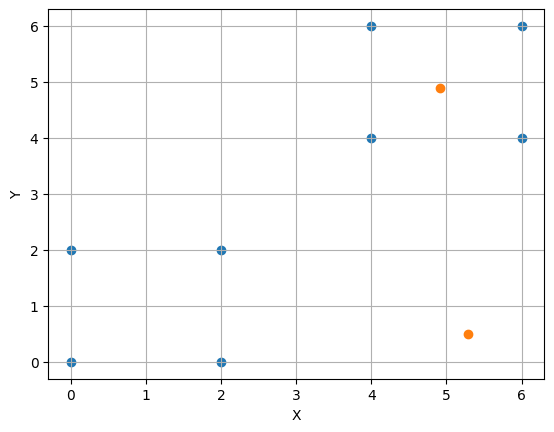

In [3]:
x_coords = X[:, 0]
y_coords = X[:, 1]
x_cluster = cluster_origin[:,0]
y_cluster = cluster_origin[:,1]

plt.scatter(x_coords, y_coords)
plt.scatter(x_cluster, y_cluster)

plt.xlabel('X')
plt.ylabel('Y')

plt.grid(True)
plt.show()

In [4]:
idx = []
iter_idx = []
alpha_idx = []
data_point = []
w1x = []
w1y = []
w2x = []
w2y = []
closest_centroid = []
c1_dist_change = []
c2_dist_change = []

In [5]:
def SOM(x, initial_centroids, num_iter, learning_rate, multiplier):
    centroids = initial_centroids.copy() #Digunakan agar tidak mengubah nilai initial centroid
    K = centroids.shape[0] #Mengambil dimensi centroid sebagai dasar iterasi
    n = 1 #Inisiasi nilai n
    iterasi = 0 #Inisiasi iterasi
    for i in range(num_iter):
    #For terluar untuk mencatat iterasi/perulangan setiap batch (Disebut sebagai iterasi)
        print(f"\nIterasi ke {i+1} / {num_iter}")

        iterasi += 1

        for j in range(x.shape[0]):
        #For kedua untuk mencatat iterasi setiap data point (Disebut sebagai step)
            idx.append(n)
            iter_idx.append(iterasi)
            alpha_idx.append(learning_rate)
            data_point.append(X[j])
            w1x.append(centroids[0][0].copy())
            w1y.append(centroids[0][1].copy())
            w2x.append(centroids[1][0].copy())
            w2y.append(centroids[1][1].copy())
            print(f"\nStep {n}")

            n += 1
            distances = np.linalg.norm(x[j] - centroids, axis=1, ord=2) #Menghitung jarak data point menuju seluruh centroid
            closest_centroids_idx = np.argmin(distances) #Memilih centroid dengan jarak terdekat
            prev_centroids = centroids.copy() 

            print(f"\nJarak X{j+1} ke centroid terdekat (W{closest_centroids_idx+1}) = {distances[closest_centroids_idx]}")
            for k in range(K):
            #For ketiga untuk mengubah posisi centroid yang terdekat dengan data point 
                if k == closest_centroids_idx:
                    closest_centroid.append((closest_centroids_idx)+1)

                    centroids[k] += learning_rate * (x[j] - centroids[k]) #Reposisi centroid baru berdasarkan learning rate alpha (learning_rate)
                    dist_change = np.linalg.norm(centroids[k] - prev_centroids[k], ord=2) #Menghitung selisih jarak centroid lama dan baru

                    print(f"\nKoordinat W{k+1} baru = {centroids[k]}")
                    print(f"\nJarak W{k+1} ke W{k+1}` = {dist_change}")
                    
            c1_dist_change.append(np.linalg.norm(prev_centroids[0] - centroids[0]))
            c2_dist_change.append(np.linalg.norm(prev_centroids[1] - centroids[1]))
            
        learning_rate = learning_rate * multiplier #learning_rate disesuaikan setelah satu iterasi selesai dilakukan
        
        print(f"Koordinat akhir W1 dan W2 setelah iterasi ke-{n-1}:")
        print(centroids)
    return centroids

In [6]:
results = SOM(X, cluster_origin, iteration, alpha, multiplier)


Iterasi ke 1 / 5

Step 1

Jarak X1 ke centroid terdekat (W1) = 5.310492278801994

Koordinat W1 baru = [2.64347878 0.24970383]

Jarak W1 ke W1` = 2.655246139400997

Step 2

Jarak X2 ke centroid terdekat (W1) = 0.6902296313850844

Koordinat W1 baru = [2.32173939 0.12485192]

Jarak W1 ke W1` = 0.3451148156925422

Step 3

Jarak X3 ke centroid terdekat (W1) = 2.9844018037379416

Koordinat W1 baru = [1.16086969 1.06242596]

Jarak W1 ke W1` = 1.492200901868971

Step 4

Jarak X4 ke centroid terdekat (W1) = 1.258246697729858

Koordinat W1 baru = [1.58043485 1.53121298]

Jarak W1 ke W1` = 0.629123348864929

Step 5

Jarak X5 ke centroid terdekat (W2) = 1.2793486226589963

Koordinat W2 baru = [4.45942218 4.44510053]

Jarak W2 ke W2` = 0.6396743113294984

Step 6

Jarak X6 ke centroid terdekat (W2) = 1.6035880092392925

Koordinat W2 baru = [5.22971109 4.22255027]

Jarak W2 ke W2` = 0.8017940046196462

Step 7

Jarak X7 ke centroid terdekat (W2) = 2.1613692233546358

Koordinat W2 baru = [4.61485555 5

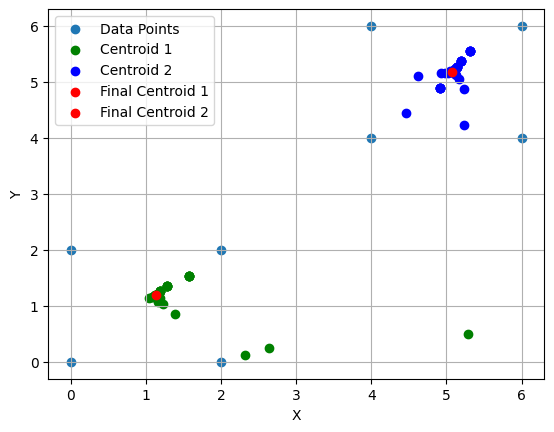

In [7]:
x_coords = X[:, 0]
y_coords = X[:, 1]
w1 = np.array([[w1x,w1y]], dtype=float)
w2 = np.array([[w2x,w2y]], dtype=float)
x_1 = w1[:,0]
y_1 = w1[:,1]
x_2 = w2[:,0]
y_2 = w2[:,1]

plt.scatter(x_coords, y_coords, label='Data Points')
plt.scatter(x_1, y_1, color='green', label='Centroid 1')
plt.scatter(x_2, y_2, color='blue', label='Centroid 2')
plt.scatter(x_1[0,-1], y_1[0,-1], color='red', label='Final Centroid 1')
plt.scatter(x_2[0,-1], y_2[0,-1], color='red', label='Final Centroid 2')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
df_dict = {'No.': idx,
           'Iterasi': iter_idx,
           'X': data_point,
           'Alpha': alpha_idx,
           'W1x': w1x,
           'W1y': w1y,
           'W2x': w2x,
           'W2y': w2y,
           'Centroid Terdekat': closest_centroid,
           'Jarak W1 ke W1`': c1_dist_change,
           'Jarak W2 ke W2`': c2_dist_change,
           }
df = pd.DataFrame(df_dict)
df

,No.,Iterasi,X,Alpha,W1x,W1y,W2x,W2y,Centroid Terdekat,Jarak W1 ke W1`,Jarak W2 ke W2`
0,1,1,"[0, 0]",0.50000,5.286958,0.499408,4.918844,4.890201,1,2.655246,0.000000
1,2,1,"[2, 0]",0.50000,2.643479,0.249704,4.918844,4.890201,1,0.345115,0.000000
2,3,1,"[0, 2]",0.50000,2.321739,0.124852,4.918844,4.890201,1,1.492201,0.000000
3,4,1,"[2, 2]",0.50000,1.160870,1.062426,4.918844,4.890201,1,0.629123,0.000000
4,5,1,"[4, 4]",0.50000,1.580435,1.531213,4.918844,4.890201,2,0.000000,0.639674
5,6,1,"[6, 4]",0.50000,1.580435,1.531213,4.459422,4.445101,2,0.000000,0.801794
6,7,1,"[4, 6]",0.50000,1.580435,1.531213,5.229711,4.222550,2,0.000000,1.080685
7,8,1,"[6, 6]",0.50000,1.580435,1.531213,4.614856,5.111275,2,0.000000,0.822870
8,9,2,"[0, 0]",0.25000,1.580435,1.531213,5.307428,5.555638,1,0.550136,0.000000
9,10,2,"[2, 0]",0.25000,1.185326,1.148410,5.307428,5.555638,1,0.352007,0.000000
